Setup and imports

In [1]:
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Auto-reload
%load_ext autoreload
%autoreload 2

# Imports
import pandas as pd
import matplotlib.pyplot as plt
from src.features import create_rfm
from src.clustering import scale_rfm, run_kmeans, get_elbow_sse

Load cleaned data

In [2]:
df = pd.read_csv("../data/online_retail_cleaned.csv")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

Create RFM features

In [3]:
rfm = create_rfm(df)

Scale RFM and find optimal K

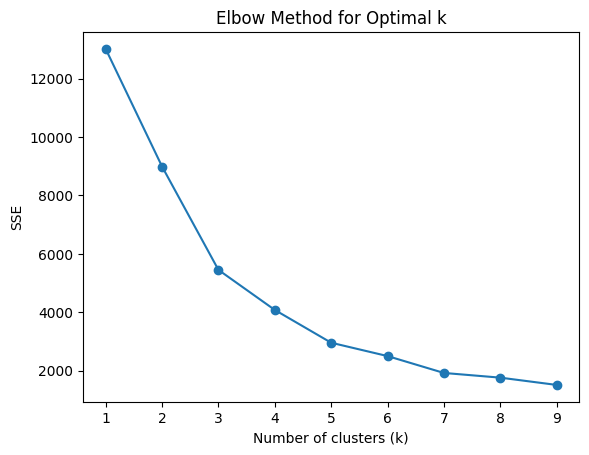

In [4]:
rfm_scaled = scale_rfm(rfm)

# Elbow Method
sse = get_elbow_sse(rfm_scaled, max_k=10)

plt.plot(range(1, 10), sse, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE")
plt.show()

Run KMeans clustering

In [5]:
labels, _ = run_kmeans(rfm_scaled, n_clusters=4)
rfm['Segment'] = labels

# View segmentation
rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
})

,Recency,Frequency,Monetary,CustomerID
Segment,,,,
0,40.443245,101.011104,1943.356013,3242
1,30.000000,915.857143,121183.096429,14
2,246.330241,27.386827,563.855622,1078
3,1.000000,5717.250000,70612.247500,4


Save segmentation results

In [6]:
rfm.to_csv("../results/customer_segments.csv", index=False)
print("✅ Customer segments saved to 'results/customer_segments.csv'")

✅ Customer segments saved to 'results/customer_segments.csv'
